In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/My Drive/klasifikasi_songket

/content/gdrive/My Drive/klasifikasi_songket


In [3]:
! ls

dataset_songket  dataset_split	model_C2.h5


Read Random Data

In [4]:
from PIL import Image
import os
import numpy as np
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Ukuran gambar:{img.shape}")
  return img

Ukuran gambar:(224, 224, 3)


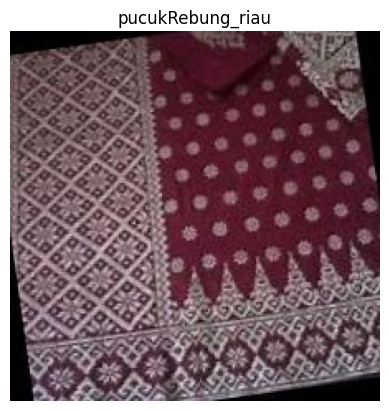

In [6]:
img = view_random_image("dataset_split/train/", "pucukRebung_riau")

Data Preprocessing

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
base_dir = '/content/gdrive/My Drive/klasifikasi_songket/dataset_split/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [10]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224,224),
                                                    class_mode='categorical',
                                                    batch_size=20)

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                    target_size=(224,224),
                                                    class_mode='categorical',
                                                    batch_size=20)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224,224),
                                                  class_mode='categorical',
                                                  batch_size=20)

Found 366 images belonging to 4 classes.
Found 79 images belonging to 4 classes.
Found 79 images belonging to 4 classes.


In [11]:
classes=list(train_generator.class_indices.keys())
print (classes)
class_count=len(classes)

['bunga_palembang', 'pucukRebung_riau', 'sirangkak_sumateraBarat', 'subahnale_lombok']


Build Model

In [12]:
#model = tf.keras.models.Sequential([
#    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(200, 200, 3)),
#    tf.keras.layers.MaxPooling2D(2, 2),
#    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#    tf.keras.layers.MaxPooling2D(2,2),
#    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#    tf.keras.layers.MaxPooling2D(2,2),
#    tf.keras.layers.Dropout(0.5),
#    tf.keras.layers.Dense(256, activation='relu'),
#    tf.keras.layers.Dropout(0.5),
#    tf.keras.layers.Flatten(),
#    tf.keras.layers.Dense(4, activation='softmax')
#])

base_model=tf.keras.applications.mobilenet.MobileNet(include_top=False,
                                                     weights="imagenet",
                                                     input_shape=(224, 224, 3))

#base_model.summary()

base_model.trainable = False

model = tf.keras.models.Sequential([
            base_model,
            tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', strides=1),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.5),

            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(4, activation='softmax')
])


# Print the model summary
#model.summary()

17225924/17225924 [==============================] - 0s 0us/step


In [13]:
optimizer = tf.keras.optimizers.Adam(learning_rate=.001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(train_generator,
                    epochs=50,
                    validation_data=validation_generator,
                    verbose=1)

Epoch 1/50
19/19 [==============================] - 104s 5s/step - loss: 1.8323 - accuracy: 0.5355 - val_loss: 0.5699 - val_accuracy: 0.7975
Epoch 2/50
19/19 [==============================] - 1s 71ms/step - loss: 0.4424 - accuracy: 0.8333 - val_loss: 0.3089 - val_accuracy: 0.8861
Epoch 3/50
19/19 [==============================] - 2s 87ms/step - loss: 0.2279 - accuracy: 0.9180 - val_loss: 0.1957 - val_accuracy: 0.9114
Epoch 4/50
19/19 [==============================] - 2s 84ms/step - loss: 0.1111 - accuracy: 0.9672 - val_loss: 0.1373 - val_accuracy: 0.9494
Epoch 5/50
19/19 [==============================] - 2s 80ms/step - loss: 0.0683 - accuracy: 0.9699 - val_loss: 0.1029 - val_accuracy: 0.9494
Epoch 6/50
19/19 [==============================] - 1s 70ms/step - loss: 0.0511 - accuracy: 0.9809 - val_loss: 0.0907 - val_accuracy: 0.9747
Epoch 7/50
19/19 [==============================] - 1s 68ms/step - loss: 0.0281 - accuracy: 0.9918 - val_loss: 0.0855 - val_accuracy: 0.9620
Epoch 8/50
19

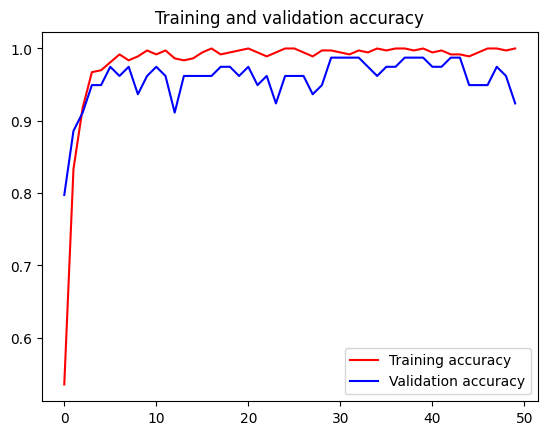

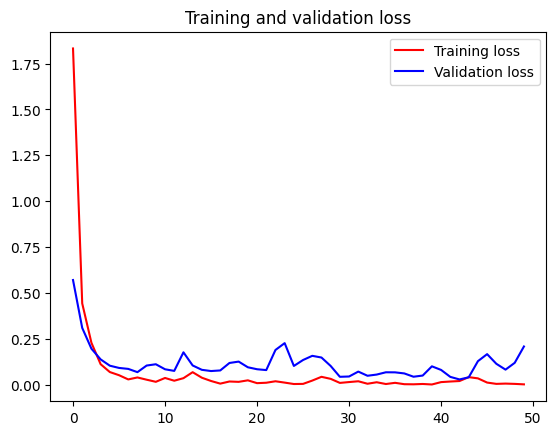

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

Save Model

In [16]:
model.save("songketa_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
